In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [5]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [6]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
194,50.9,19.1,196.0,3550.0,1,0,0,1
22,35.9,19.2,189.0,3800.0,0,0,1,0
92,34.0,17.1,185.0,3400.0,1,0,1,0
149,37.8,18.1,193.0,3750.0,1,0,0,1
156,52.7,19.8,197.0,3725.0,1,0,0,1
...,...,...,...,...,...,...,...,...
81,42.9,17.6,196.0,4700.0,0,1,0,1
93,39.6,18.1,186.0,4450.0,1,0,0,1
69,41.8,19.4,198.0,4450.0,0,1,0,1
335,55.1,16.0,230.0,5850.0,0,0,0,1


In [10]:
from sklearn.ensemble import RandomForestClassifier


In [11]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


In [12]:
model=RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [13]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [15]:
y_hat=model.predict(X_test)

# Evaulation

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [19]:
accuracy_score(y_test,y_hat)

0.9702970297029703

In [20]:
confusion_matrix(y_test,y_hat)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


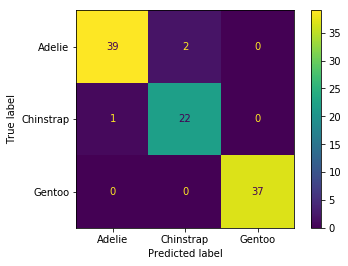

In [22]:
plot_confusion_matrix(model,X_test,y_test)

Adelie = 39 are adelie and 2 are misjudged as chinstrap
Chinstrap= 1 is misjudged as Adelie and 22 are chinstrap
Gentoo = no misjudgement found all 37 are gentoo

## Feature Importance 

In [23]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

## Choosing Corrent N_Estimates improves performance and reduces computation 

In [24]:
test_error=[]

for n in range(1,40):
    # use random number of trees
    model=RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds=model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

In [25]:
test_error

[0.03960396039603964,
 0.02970297029702973,
 0.03960396039603964,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.02970297029702973,
 0.00990099009900991,
 0.00990099009900991,
 0.02970297029702973,
 0.00990099009900991,
 0.02970297029702973,
 0.00990099009900991,
 0.00990099009900991,
 0.02970297029702973,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.01980198019801982,
 0.00990099009900991]

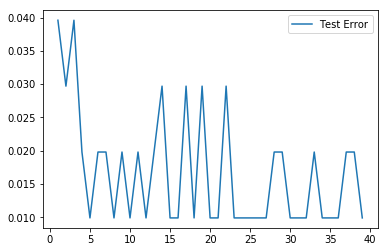

In [26]:
plt.plot(range(1,40),test_error,label="Test Error")
plt.legend()

    we can use n_estimate = 5

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
n_estimators=[64,100,128,200]
max_features=[2,3,4]
bootstrap=[True,False]
oob_score=[True,False]

In [30]:
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'bootstrap':bootstrap,
           'oob_score':oob_score}

In [31]:
rfc=RandomForestClassifier()

In [32]:
grid=GridSearchCV(rfc,param_grid)

In [33]:
grid.fit(X_train,y_train)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\test\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\test\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\User

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [34]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': False}

In [35]:
predictions = grid.predict(X_test)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



C:\Users\test\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


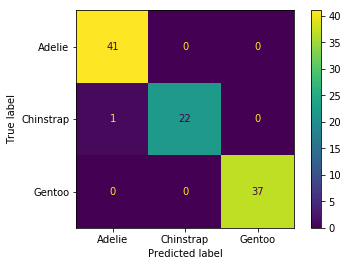

In [37]:
plot_confusion_matrix(grid,X_test,y_test)

In [38]:
# No underscore, reports back original oob_score parameter
grid.best_estimator_.oob_score

False

In [40]:
# With underscore, reports back fitted attribute of oob_score
grid.best_estimator_.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

## Understanding the number of estimators 

In [41]:
from sklearn.metrics import accuracy_score

In [45]:
error=[]
missclassification=[]

for n in range(1,100):
    rfc=RandomForestClassifier(n_estimators=n,bootstrap=True,max_features=2)
    rfc.fit(X_train,y_train)
    preds=rfc.predict(X_test)
    err=1-accuracy_score(preds,y_test)
    n_missed=np.sum(preds !=y_test)
    error.append(err)
    missclassification.append(n_missed)

In [46]:
len(error)

99

In [47]:
error

[0.09900990099009899,
 0.1089108910891089,
 0.02970297029702973,
 0.02970297029702973,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.01980198019801982,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.01980198019801982,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.00990099009900991,
 0.02970297029702973,
 0.00990099

In [48]:
min(error)

0.00990099009900991

In [49]:
temp=min(error)

In [50]:
index=error.index(temp)

In [55]:
index

7

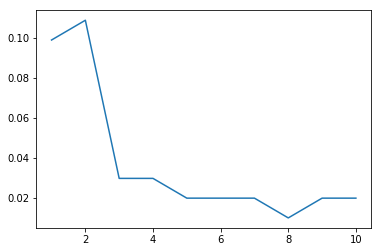

In [58]:
#plt.plot(range(1,100),errors)
plt.plot(range(1,11),error[0:10])

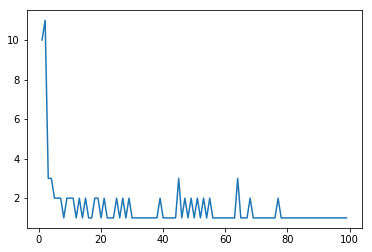

In [61]:
plt.plot(range(1,100),missclassification[0:99])

In [65]:
#best model according to cross validation and gridsearch
rfc = RandomForestClassifier( n_estimators=7,bootstrap=True,max_features= 2, oob_score=True)
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
err = 1 - accuracy_score(preds,y_test)

C:\Users\test\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


In [66]:
accuracy_score(y_test,preds)

0.9702970297029703

In [67]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101

